# Understanding Surface Properties (2): LAI

## Objectives

1. Understand the dynamics of LAI at different temporal scales (e.g., sub-daily, seasonal)

2. Understand the effects of LAI dynamics on albedo

## Tasks

### load necessary packages

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pathlib import Path
import datetime

### Name of the site and group number

### loading data for albedo calculation

In [17]:
group_number=2
path_dir = Path.cwd()/'data'/f'{group_number}'
# examine available files in your folder
list(path_dir.glob('*gz'))


[PosixPath('/Users/hamidrezaomidvar/Desktop/BLM/docs/tasks/data/2/US-MMS_clean.csv.gz')]

In [18]:
name_of_site='US-MMS' #

In [19]:
# load dataset
site_file=name_of_site+'_clean.csv.gz'
path_data = path_dir/site_file
df_data = pd.read_csv(path_data, index_col='time',parse_dates=['time'])
df_data.head()

,WS,RH,TA,PA,WD,P,SWIN,LWIN,SWOUT,LWOUT,NETRAD,H,LE
time,,,,,,,,,,,,,
1999-01-01 01:00:00,2.98,NaN,NaN,99.0,95.50,0.0,0.0,190.0,0.0,250.7,-60.7,-21.310,-0.350
1999-01-01 02:00:00,2.93,NaN,NaN,99.0,108.71,0.0,0.0,188.0,0.0,248.8,-60.8,-14.473,-0.321
1999-01-01 03:00:00,2.96,NaN,NaN,99.0,122.46,0.0,0.0,187.5,0.0,247.6,-60.1,-16.784,-0.786
1999-01-01 04:00:00,3.03,NaN,NaN,99.1,118.99,0.0,0.0,187.6,0.0,247.7,-60.1,-12.367,-0.191
1999-01-01 05:00:00,3.63,NaN,NaN,99.2,124.80,0.0,0.0,186.4,0.0,246.9,-60.5,-23.069,-0.650


### Take a look at the raditation data

Text(0.5, 0, 'Time')

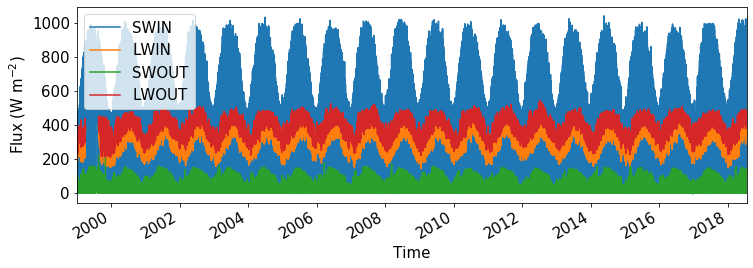

In [20]:
fontsize=15
df_data.loc[:,['SWIN','LWIN','SWOUT','LWOUT']].plot(figsize=(12,4),fontsize=fontsize)
plt.ylabel('Flux (W m$^{-2}$)',fontsize=fontsize)
plt.xlabel('Time',fontsize=fontsize)

### Loading LAI data + some data cleaning

In [21]:
def DOY_to_datetime(row):
    year=int(row['modis_date'][1:5])
    DOY=int(row['modis_date'][5:])
    return datetime.datetime(year, 1, 1) + datetime.timedelta(DOY - 1)

df_LAI=pd.read_csv('data/MODIS_LAI_AmeriFlux/statistics_Lai_500m-'+name_of_site+'.csv')
df_LAI.columns=['product']+[i.split(' ')[1] for i in df_LAI.columns if i!='product']
df_LAI=df_LAI.filter(['modis_date','value_mean'])


df_LAI.set_index(df_LAI.apply(DOY_to_datetime,axis=1),inplace=True)
df_LAI.drop('modis_date',axis=1,inplace=True)
df_LAI.head()

,value_mean
2002-07-04,5.1042
2002-07-08,3.2211
2002-07-12,3.6012
2002-07-16,4.2047
2002-07-20,4.0568


Text(0.5, 0, 'Time')

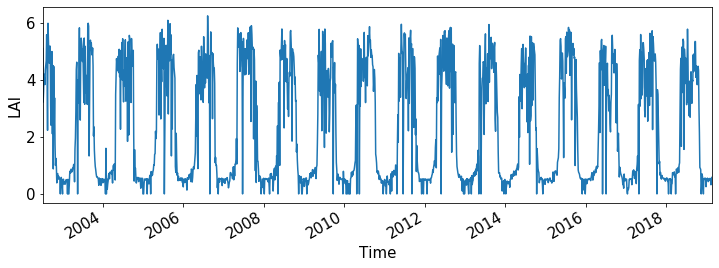

In [22]:
fontsize=15
df_LAI.plot(legend=False,figsize=(12,4),fontsize=fontsize)
plt.ylabel('LAI',fontsize=fontsize)
plt.xlabel('Time',fontsize=fontsize)

## examine results

### Choose the desire period

In [23]:
start_period='2006-01-01'
end_period='2007-01-01'

In [24]:
df_data_period=df_data.loc[start_period:end_period]
df_LAI_period=df_LAI.loc[start_period:end_period]

### Alebdo calculation

Text(0.5, 0, 'Time')

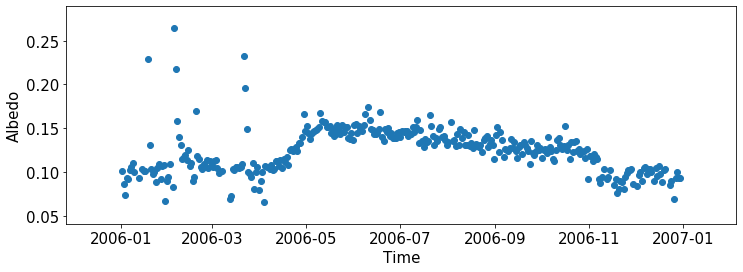

In [25]:
ser_alb=df_data_period['SWOUT']/df_data_period['SWIN']
ser_alb=ser_alb[ser_alb.index.time==datetime.time(12, 0)]
ser_alb_clean=ser_alb[ser_alb.between(0,1)&(df_data_period['SWIN']>5)]


plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(12,4))
plt.scatter(ser_alb_clean.index,ser_alb_clean)
plt.ylabel('Albedo')
plt.xlabel('Time')

### explore the relationship between albedo and LAI

(732312.0, 732677.0)

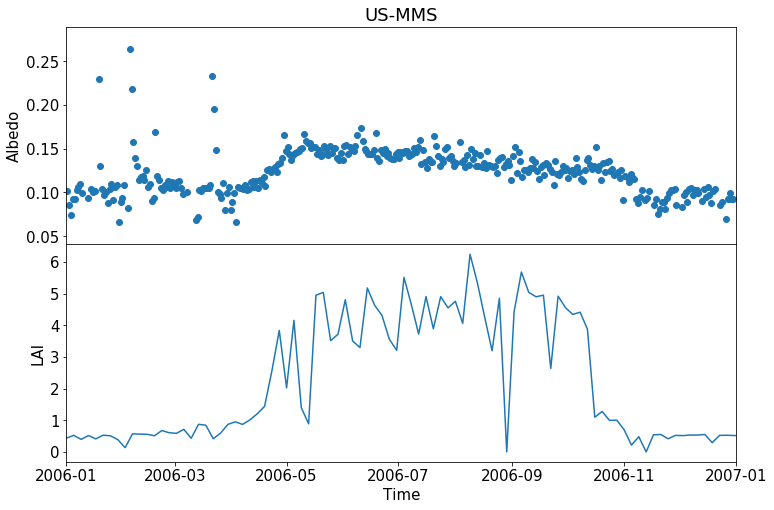

In [26]:
plt.rcParams.update({'font.size': 15})
fig,axs=plt.subplots(2,1,figsize=(12,8))
fig.subplots_adjust(hspace=0)
ax1=axs[0]
ax2=axs[1]

ax1.scatter(ser_alb_clean.index,ser_alb_clean)
ax1.set_ylabel('Albedo')
ax1.set_xlim([start_period,end_period])
ax1.set_xticks([])
ax1.set_title(name_of_site)


ax2.plot(df_LAI_period.index,df_LAI_period)
ax2.set_ylabel('LAI')
ax2.set_xlabel('Time')
ax2.set_xlim([start_period,end_period])